#About

This analysis focuses on the behavior of telecom customers who are more likely to leave the platform. We intend to find out the most striking behavior of customers through Exploratory Data Analysis (EDA) and later on use some of the predictive analytics techniques to determine the customers who are most likely to churn.

#Identify

1. CustomerID: A unique ID that identifies each customer.
2. Gender: The customer’s gender: Male, Female
3. Senior Citizen: Indicates if the customer is 65 or older: Yes, No
4. Married (Partner): Indicates if the customer is married: Yes, No
5. Dependents: Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.
6. Tenure: Indicates the total amount of months that the customer has been with the company.
7. Phone Service: Indicates if the customer subscribes to home phone service with the company: Yes, No
8. Multiple Lines: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No
9. Internet Service: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.
10. Online Security: Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No
11. Online Backup: Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No
12. Device Protection Plan: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No
13. Premium Tech Support: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No
14. Streaming TV: Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.
15. Streaming Movies: Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.
16. Contract: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.
17. Paperless Billing: Indicates if the customer has chosen paperless billing: Yes, No
18. Payment Method: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check
19. Monthly Charge: Indicates the customer’s current total monthly charge for all their services from the company.
20. Total Charges: Indicates the customer’s total charges, calculated to the end of the quarter specified above.
21. Churn: Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.


#Load Dataset

In [1]:
#Import library
import pandas as pd
import numpy as np

df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [3]:
df = df.drop('customerID',axis=1).copy()

In [4]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

In [6]:
df.isnull().sum()


gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
df.dropna(inplace = True)

In [8]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
df2 = df.iloc[:,1:]
df2

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [10]:
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No',  value=0, inplace=True)
df_dummies = pd.get_dummies(df2)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0


#Import Libraries EDA

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

#Exploratory Data Analysis

## Numerical Variable

In terms of numerical variables, there are three numerical variables that are related with Customer ID. The numerical variables look normal data.

In [12]:
df['tenure']= df['tenure'].astype(float)
numerical= df.select_dtypes('number').columns

df[numerical].describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


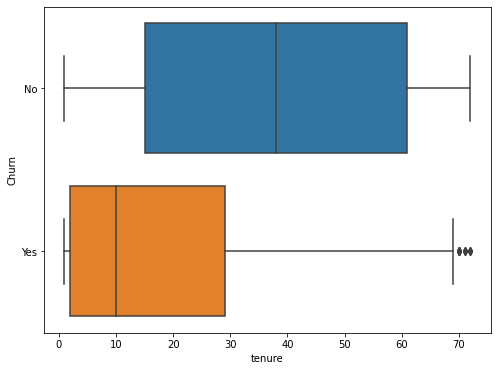

In [13]:
plt.figure(figsize=(8,6))
sns.boxplot(x='tenure', y='Churn',data=df);

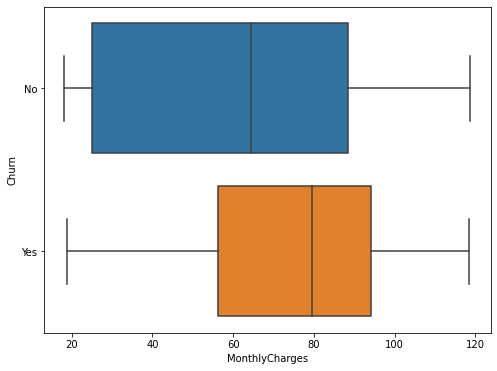

In [14]:
plt.figure(figsize=(8,6))
sns.boxplot(x='MonthlyCharges', y='Churn',data=df);

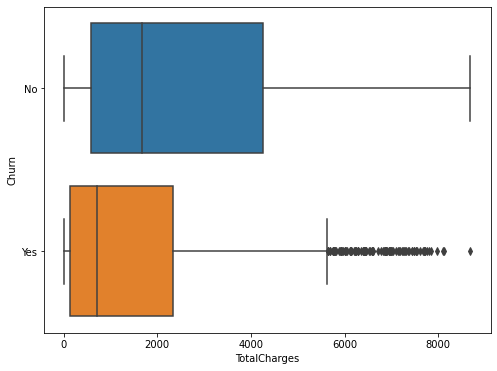

In [15]:
plt.figure(figsize=(8,6))
sns.boxplot(x='TotalCharges', y='Churn',data=df);

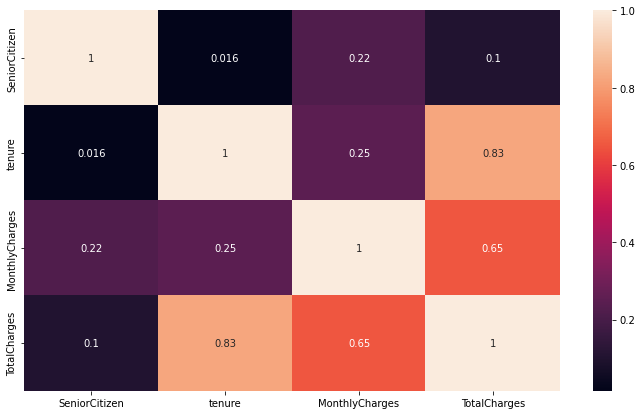

In [16]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(), annot=True)
plt.show()

## Categorical Variable

In [17]:
categorical = df.select_dtypes('object').columns
df[categorical].nunique()

gender              2
Partner             2
Dependents          2
PhoneService        2
MultipleLines       3
InternetService     3
OnlineSecurity      3
OnlineBackup        3
DeviceProtection    3
TechSupport         3
StreamingTV         3
StreamingMovies     3
Contract            3
PaperlessBilling    2
PaymentMethod       4
Churn               2
dtype: int64

In [18]:
for feature in df[categorical]:
        print(f'{feature}: {df[feature].unique()}')

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [19]:
columns = {'gender':1, 'Partner':2, 'Dependents':3, 'PhoneService':4, 'MultipleLines':5, 'InternetService':6, 'OnlineSecurity':7, 'OnlineBackup':8, 'DeviceProtection':9,
          'TechSupport':10, 'StreamingTV':11, 'StreamingMovies':12, 'Contract':13, 'PaperlessBilling':14, 'PaymentMethod':15}

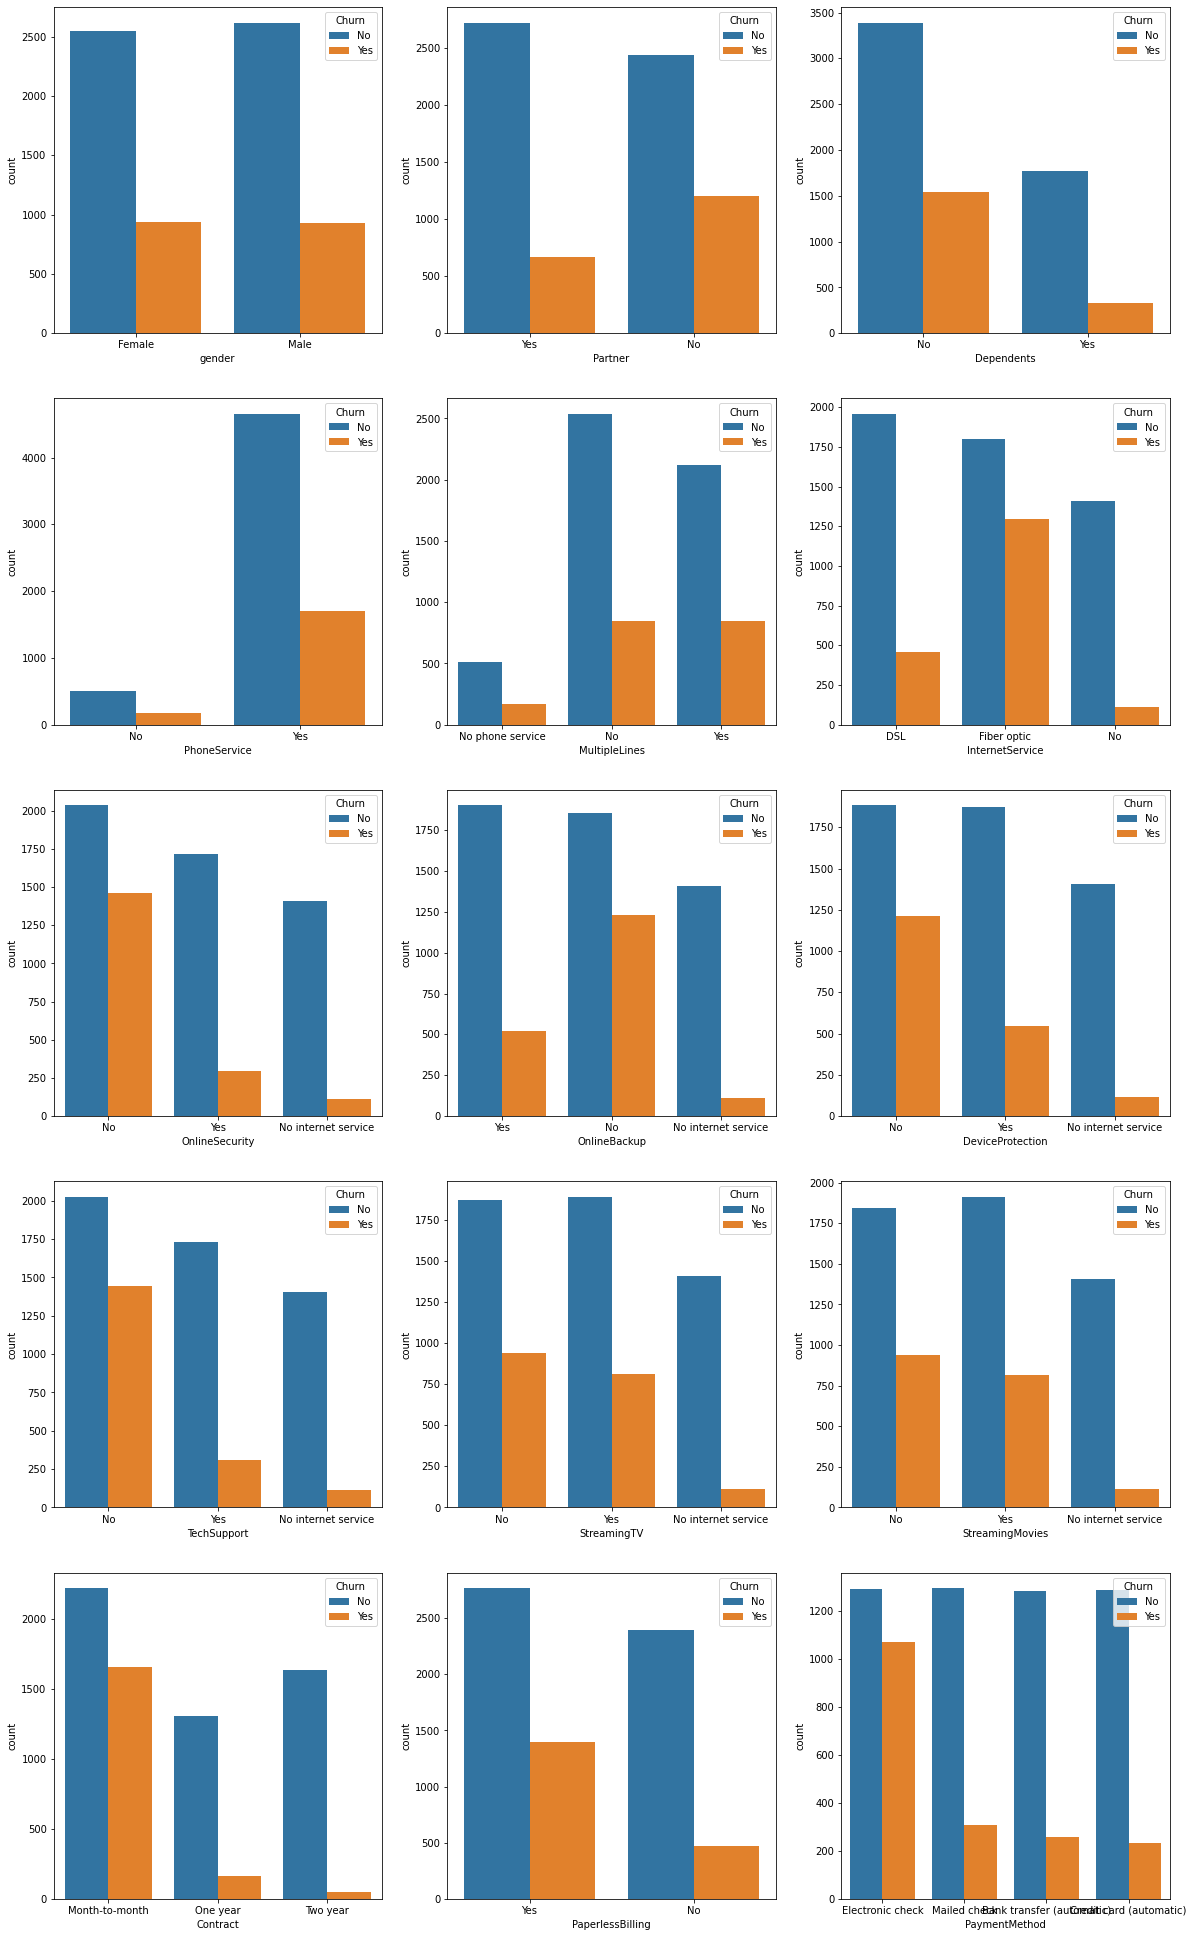

In [20]:
plt.figure(figsize=(20, 42))

for key, value in columns.items():
    plt.subplot(6, 3, value)
    sns.countplot(x=key, hue='Churn', data=df)

#Dummies Columns

In [21]:
df_dummies.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Partner_No', 'Partner_Yes', 'Dependents_No', 'Dependents_Yes',
       'PhoneService_No', 'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaperlessBilling_No', 'Paperle

In [22]:
dtrain_material = df_dummies[['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaperlessBilling_No', 'PaperlessBilling_Yes',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']].copy()

In [23]:
dtrain_material.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0


In [24]:
dtrain_x = dtrain_material[['SeniorCitizen', 
                            'tenure', 'MonthlyCharges', 
                            'TotalCharges', 
                            'Partner_No', 
                            'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaperlessBilling_No', 'PaperlessBilling_Yes',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']].copy()

In [25]:
dtrain_y = df_dummies['Churn']
dtrain_y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

#Import Libraries Modelling

In [26]:
#import libaries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.metrics import classification_report, confusion_matrix

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


#Imbalance Dataset

In [27]:
features = dtrain_material[['SeniorCitizen', 
                            'tenure', 'MonthlyCharges', 
                            'TotalCharges', 
                            'Partner_No', 
                            'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaperlessBilling_No', 'PaperlessBilling_Yes',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']].copy()
target = df_dummies['Churn']

In [28]:
X_train,X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=2, stratify=target)
print("Split Data "'X_train: {} | X_test: {} | y_train: {} | y_test: {}'.format(len(X_train),len(X_test),len(y_train),len(y_test)))

Split Data X_train: 4922 | X_test: 2110 | y_train: 4922 | y_test: 2110


##Logistic Regression

In [29]:
LR = LogisticRegression(max_iter=7000)
LR.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=7000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
LR_predictions = LR.predict(X_test)
accuracy_score(y_test, LR_predictions)

0.8042654028436019

In [31]:
print(f"Accuracy score for Train data: {LR.score(X_train , y_train)}")
print(f"Accuracy Score for Test data: {accuracy_score(y_test, LR_predictions)}")

Accuracy score for Train data: 0.8075985371800082
Accuracy Score for Test data: 0.8042654028436019


In [32]:
print(classification_report(y_test,LR_predictions))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1549
           1       0.66      0.55      0.60       561

    accuracy                           0.80      2110
   macro avg       0.75      0.72      0.73      2110
weighted avg       0.80      0.80      0.80      2110



##Support Vector Machine

In [33]:
svm = SVC(gamma='auto',random_state=2, max_iter=10000)
svm.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=10000, probability=False, random_state=2, shrinking=True,
    tol=0.001, verbose=False)

In [34]:
svm_predictions = svm.predict(X_test)
accuracy_score(y_test, svm_predictions)

0.7706161137440758

In [35]:
print(f"Accuracy score for Train data: {svm.score(X_train , y_train)}")
print(f"Accuracy Score for Test data: {accuracy_score(y_test, svm_predictions)}")

Accuracy score for Train data: 0.9110117838277123
Accuracy Score for Test data: 0.7706161137440758


In [36]:
print(classification_report(y_test,svm_predictions))

              precision    recall  f1-score   support

           0       0.79      0.94      0.86      1549
           1       0.65      0.30      0.41       561

    accuracy                           0.77      2110
   macro avg       0.72      0.62      0.63      2110
weighted avg       0.75      0.77      0.74      2110



##Random Forest

In [37]:
rf = RandomForestClassifier(n_estimators=200,random_state=2)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

In [38]:
rf_predictions = rf.predict(X_test)
accuracy_score(y_test, rf_predictions)

0.7928909952606635

In [39]:
print(f"Accuracy score for Train data: {rf.score(X_train , y_train)}")
print(f"Accuracy Score for Test data: {accuracy_score(y_test, rf_predictions)}")

Accuracy score for Train data: 0.9975619666802112
Accuracy Score for Test data: 0.7928909952606635


In [40]:
print(classification_report(y_test,rf_predictions))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1549
           1       0.65      0.48      0.55       561

    accuracy                           0.79      2110
   macro avg       0.74      0.69      0.71      2110
weighted avg       0.78      0.79      0.78      2110



##Decision Tree

In [41]:
dt = DecisionTreeClassifier(random_state=2,criterion='gini')
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=2, splitter='best')

In [42]:
dt_predictions = dt.predict(X_test)
accuracy_score(y_test, dt_predictions)

0.7573459715639811

In [43]:
print(f"Accuracy score for Train data: {dt.score(X_train , y_train)}")
print(f"Accuracy Score for Test data: {accuracy_score(y_test, dt_predictions)}")

Accuracy score for Train data: 0.9975619666802112
Accuracy Score for Test data: 0.7573459715639811


In [44]:
print(classification_report(y_test,dt_predictions))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83      1549
           1       0.54      0.56      0.55       561

    accuracy                           0.76      2110
   macro avg       0.69      0.69      0.69      2110
weighted avg       0.76      0.76      0.76      2110



##KNN (K Nearest Neighbors)

In [45]:
KNear=KNeighborsClassifier(n_neighbors=10)
KNear.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [46]:
KNear_predictions = KNear.predict(X_test)
accuracy_score(y_test, KNear_predictions)

0.7791469194312797

In [47]:
print(f"Accuracy score for Train data: {KNear.score(X_train , y_train)}")
print(f"Accuracy Score for Test data: {accuracy_score(y_test, KNear_predictions)}")

Accuracy score for Train data: 0.8094270621698496
Accuracy Score for Test data: 0.7791469194312797


In [48]:
print(classification_report(y_test,KNear_predictions))

              precision    recall  f1-score   support

           0       0.80      0.94      0.86      1549
           1       0.66      0.35      0.45       561

    accuracy                           0.78      2110
   macro avg       0.73      0.64      0.66      2110
weighted avg       0.76      0.78      0.75      2110



##XGBoost

In [49]:
!pip install xgboost

In [50]:
from xgboost import XGBClassifier
xgbc_base = XGBClassifier(random_state=2)
xgbc_base.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=2,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [51]:
xgbc_pred = xgbc_base.predict(X_test)
accuracy_score(y_test, xgbc_pred)

0.7990521327014218

In [52]:
print(f"Accuracy score for Train data: {xgbc_base.score(X_train , y_train)}")
print(f"Accuracy Score for Test data: {accuracy_score(y_test, xgbc_pred)}")

Accuracy score for Train data: 0.8234457537586347
Accuracy Score for Test data: 0.7990521327014218


In [53]:
print(classification_report(y_test,xgbc_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1549
           1       0.66      0.50      0.57       561

    accuracy                           0.80      2110
   macro avg       0.75      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110



##Gradient Boosting

In [54]:
GB = GradientBoostingClassifier(n_estimators=120, learning_rate=0.5, max_depth=1, random_state=2)
GB.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.5, loss='deviance', max_depth=1,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=120,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=2, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [55]:
GB_pred = GB.predict(X_test)
accuracy_score(y_test, GB_pred)

0.8042654028436019

In [56]:
print(f"Accuracy score for Train data: {GB.score(X_train , y_train)}")
print(f"Accuracy Score for Test data: {accuracy_score(y_test, GB_pred)}")

Accuracy score for Train data: 0.8177570093457944
Accuracy Score for Test data: 0.8042654028436019


In [57]:
print(classification_report(y_test,GB_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1549
           1       0.67      0.52      0.59       561

    accuracy                           0.80      2110
   macro avg       0.75      0.71      0.73      2110
weighted avg       0.79      0.80      0.80      2110



##CatBoost

In [58]:
!pip install catboost

     |████████████████████████████████| 76.3 MB 21 kB/s 


In [59]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier(learning_rate=0.01)
cat.fit(X_train, y_train)

0:	learn: 0.6860003	total: 50.3ms	remaining: 50.3s
1:	learn: 0.6794260	total: 54.1ms	remaining: 27s
2:	learn: 0.6726406	total: 57.7ms	remaining: 19.2s
3:	learn: 0.6668985	total: 61ms	remaining: 15.2s
4:	learn: 0.6607843	total: 64.3ms	remaining: 12.8s
5:	learn: 0.6548303	total: 68ms	remaining: 11.3s
6:	learn: 0.6492078	total: 71.5ms	remaining: 10.1s
7:	learn: 0.6435597	total: 74.7ms	remaining: 9.27s
8:	learn: 0.6377136	total: 78.4ms	remaining: 8.64s
9:	learn: 0.6324257	total: 82.2ms	remaining: 8.13s
10:	learn: 0.6271686	total: 85.9ms	remaining: 7.72s
11:	learn: 0.6218531	total: 89.4ms	remaining: 7.36s
12:	learn: 0.6171256	total: 93ms	remaining: 7.06s
13:	learn: 0.6125447	total: 96.6ms	remaining: 6.8s
14:	learn: 0.6076938	total: 100ms	remaining: 6.59s
15:	learn: 0.6029556	total: 104ms	remaining: 6.39s
16:	learn: 0.5984414	total: 109ms	remaining: 6.31s
17:	learn: 0.5942677	total: 115ms	remaining: 6.3s
18:	learn: 0.5901334	total: 119ms	remaining: 6.14s
19:	learn: 0.5863326	total: 122ms	rem

In [60]:
cat_pred = cat.predict(X_test)
accuracy_score(y_test, cat_pred)

0.8056872037914692

In [61]:
print(f"Accuracy score for Train data: {cat.score(X_train , y_train)}")
print(f"Accuracy Score for Test data: {accuracy_score(y_test, cat_pred)}")

Accuracy score for Train data: 0.8427468508736287
Accuracy Score for Test data: 0.8056872037914692


In [62]:
print(classification_report(y_test,cat_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1549
           1       0.68      0.52      0.59       561

    accuracy                           0.81      2110
   macro avg       0.76      0.71      0.73      2110
weighted avg       0.80      0.81      0.80      2110



In [63]:
!pip install lightgbm

##LightGBM

In [64]:
import lightgbm as lgb
lgbm = lgb.LGBMClassifier(random_state=2,learning_rate=0.01)
lgbm.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.01, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=2, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [65]:
lgbm_pred = lgbm.predict(X_test)
accuracy_score(y_test, lgbm_pred)

0.7933649289099526

In [66]:
print(f"Accuracy score for Train data: {lgbm.score(X_train , y_train)}")
print(f"Accuracy Score for Test data: {accuracy_score(y_test, lgbm_pred)}")

Accuracy score for Train data: 0.8027224705404307
Accuracy Score for Test data: 0.7933649289099526


In [67]:
print(classification_report(y_test,lgbm_pred))

              precision    recall  f1-score   support

           0       0.80      0.96      0.87      1549
           1       0.77      0.32      0.45       561

    accuracy                           0.79      2110
   macro avg       0.78      0.64      0.66      2110
weighted avg       0.79      0.79      0.76      2110



#SMOTE


In [68]:
sm = SMOTE(sampling_strategy = 0.5, random_state=2)  

In [69]:
Counter(y_train)

Counter({0: 3614, 1: 1308})

In [70]:
x_res, y_res = sm.fit_resample(X_train, y_train)
Counter(y_res)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Counter({0: 3614, 1: 1807})

##Logistic Regression SMOTE

In [71]:
LR_sm = LogisticRegression(max_iter=7000)
LR_sm.fit(x_res,y_res.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=7000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [72]:
LR_sm_predictions = LR_sm.predict(X_test)
accuracy_score(y_test, LR_sm_predictions)

0.7966824644549763

In [140]:
print(f"Accuracy score for Train data: {LR_sm.score(x_res,y_res.ravel())}")
print(f"Accuracy Score for Test data: {accuracy_score(y_test, LR_sm_predictions)}")

Accuracy score for Train data: 0.781036709094263
Accuracy Score for Test data: 0.7966824644549763


In [74]:
print(classification_report(y_test,LR_sm_predictions))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1549
           1       0.61      0.64      0.62       561

    accuracy                           0.80      2110
   macro avg       0.74      0.75      0.74      2110
weighted avg       0.80      0.80      0.80      2110



##Support Vector Machine SMOTE

In [75]:
svm_sm = SVC(gamma='auto',random_state=2)
svm_sm.fit(x_res,y_res.ravel())

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=2, shrinking=True, tol=0.001,
    verbose=False)

In [76]:
svm_sm_predictions = svm_sm.predict(X_test)
accuracy_score(y_test, svm_sm_predictions)

0.7739336492890996

In [141]:
print(f"Accuracy score for Train data: {svm_sm.score(x_res,y_res.ravel())}")
print(f"Accuracy Score for Test data: {accuracy_score(y_test, svm_sm_predictions)}")

Accuracy score for Train data: 0.9223390518354547
Accuracy Score for Test data: 0.7739336492890996


In [160]:
print(classification_report(y_test,svm_sm_predictions))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86      1549
           1       0.62      0.39      0.48       561

    accuracy                           0.77      2110
   macro avg       0.71      0.65      0.67      2110
weighted avg       0.76      0.77      0.76      2110



##Random Forest SMOTE

In [79]:
rf_sm = RandomForestClassifier(n_estimators=40,random_state=2)
rf_sm.fit(x_res,y_res.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

In [80]:
rf_sm_predictions = rf_sm.predict(X_test)
accuracy_score(y_test, rf_sm_predictions)

0.7862559241706161

In [142]:
print(f"Accuracy score for Train data: {rf_sm.score(x_res,y_res.ravel())}")
print(f"Accuracy Score for Test data: {accuracy_score(y_test, rf_sm_predictions)}")

Accuracy score for Train data: 0.9964951116030253
Accuracy Score for Test data: 0.7862559241706161


In [161]:
print(classification_report(y_test,rf_sm_predictions))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1549
           1       0.63      0.49      0.55       561

    accuracy                           0.79      2110
   macro avg       0.73      0.69      0.70      2110
weighted avg       0.77      0.79      0.78      2110



##Decision Tree SMOTE

In [83]:
dt_sm = DecisionTreeClassifier(random_state=2)
dt_sm.fit(x_res,y_res.ravel())

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=2, splitter='best')

In [84]:
dt_sm_predictions = dt_sm.predict(X_test)
accuracy_score(y_test, dt_sm_predictions)

0.7327014218009479

In [143]:
print(f"Accuracy score for Train data: {dt_sm.score(x_res,y_res.ravel())}")
print(f"Accuracy Score for Test data: {accuracy_score(y_test, dt_sm_predictions)}")

Accuracy score for Train data: 0.9977863862755949
Accuracy Score for Test data: 0.7327014218009479


In [86]:
print(classification_report(y_test,dt_sm_predictions))

              precision    recall  f1-score   support

           0       0.82      0.81      0.82      1549
           1       0.50      0.52      0.51       561

    accuracy                           0.73      2110
   macro avg       0.66      0.67      0.66      2110
weighted avg       0.74      0.73      0.73      2110



##KNN (K Nearest Neighbors) SMOTE

In [87]:
KNear_sm=KNeighborsClassifier(n_neighbors=10)
KNear_sm.fit(x_res,y_res.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [88]:
KNear_sm_predictions = KNear_sm.predict(X_test)
accuracy_score(y_test, KNear_sm_predictions)

0.776303317535545

In [144]:
print(f"Accuracy score for Train data: {KNear_sm.score(x_res,y_res.ravel())}")
print(f"Accuracy Score for Test data: {accuracy_score(y_test, KNear_sm_predictions)}")

Accuracy score for Train data: 0.7952407304925291
Accuracy Score for Test data: 0.776303317535545


In [90]:
print(classification_report(y_test,KNear_sm_predictions))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1549
           1       0.60      0.46      0.52       561

    accuracy                           0.78      2110
   macro avg       0.71      0.68      0.69      2110
weighted avg       0.76      0.78      0.77      2110



##XGBoost SMOTE

In [91]:
xgbc_base_sm = XGBClassifier(random_state=2)
xgbc_base_sm.fit(x_res,y_res.ravel())

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=2,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [92]:
xgbc_sm_predictions = xgbc_base_sm.predict(X_test)
accuracy_score(y_test, xgbc_sm_predictions)

ValueError: ignored

In [ ]:
print(classification_report(y_test,xgbc_sm_predictions))

##Gradient Boosting SMOTE

In [93]:
GB_sm = GradientBoostingClassifier(n_estimators=120, learning_rate=0.01, max_depth=1, random_state=2)
GB_sm.fit(x_res,y_res.ravel())

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=1,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=120,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=2, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [94]:
GB_sm_pred = GB_sm.predict(X_test)
accuracy_score(y_test, GB_sm_pred)

0.7701421800947867

In [145]:
print(f"Accuracy score for Train data: {GB_sm.score(x_res,y_res.ravel())}")
print(f"Accuracy Score for Test data: {accuracy_score(y_test, GB_sm_pred)}")

Accuracy score for Train data: 0.7113078767755027
Accuracy Score for Test data: 0.7701421800947867


In [96]:
print(classification_report(y_test,GB_sm_pred))

              precision    recall  f1-score   support

           0       0.77      0.99      0.86      1549
           1       0.84      0.17      0.28       561

    accuracy                           0.77      2110
   macro avg       0.80      0.58      0.57      2110
weighted avg       0.79      0.77      0.71      2110



##CatBoost SMOTE

In [98]:
cat_sm = CatBoostClassifier(learning_rate=0.01)
cat_sm.fit(x_res,y_res.ravel())

0:	learn: 0.6868211	total: 9.97ms	remaining: 9.96s
1:	learn: 0.6809477	total: 17ms	remaining: 8.46s
2:	learn: 0.6753416	total: 24.8ms	remaining: 8.25s
3:	learn: 0.6694267	total: 32.4ms	remaining: 8.07s
4:	learn: 0.6638203	total: 39.7ms	remaining: 7.9s
5:	learn: 0.6581660	total: 47.1ms	remaining: 7.81s
6:	learn: 0.6528726	total: 54.5ms	remaining: 7.73s
7:	learn: 0.6475715	total: 61.8ms	remaining: 7.67s
8:	learn: 0.6427694	total: 69.4ms	remaining: 7.64s
9:	learn: 0.6377021	total: 77ms	remaining: 7.62s
10:	learn: 0.6323953	total: 84.6ms	remaining: 7.61s
11:	learn: 0.6272426	total: 92ms	remaining: 7.58s
12:	learn: 0.6225745	total: 99.5ms	remaining: 7.56s
13:	learn: 0.6184904	total: 107ms	remaining: 7.53s
14:	learn: 0.6141683	total: 115ms	remaining: 7.53s
15:	learn: 0.6099355	total: 122ms	remaining: 7.53s
16:	learn: 0.6060974	total: 130ms	remaining: 7.5s
17:	learn: 0.6021708	total: 137ms	remaining: 7.49s
18:	learn: 0.5980280	total: 145ms	remaining: 7.48s
19:	learn: 0.5943398	total: 152ms	re

In [99]:
cat_sm_pred = cat_sm.predict(X_test)
accuracy_score(y_test, cat_sm_pred)

0.8023696682464455

In [146]:
print(f"Accuracy score for Train data: {cat_sm.score(x_res,y_res.ravel())}")
print(f"Accuracy Score for Test data: {accuracy_score(y_test, cat_sm_pred)}")

Accuracy score for Train data: 0.8498432023611879
Accuracy Score for Test data: 0.8023696682464455


In [101]:
print(classification_report(y_test,cat_sm_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1549
           1       0.66      0.54      0.59       561

    accuracy                           0.80      2110
   macro avg       0.75      0.72      0.73      2110
weighted avg       0.79      0.80      0.80      2110



##LightGBM SMOTE

In [102]:
lgbm_sm = lgb.LGBMClassifier(random_state=2,learning_rate=0.01)
lgbm_sm.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.01, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=2, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [103]:
lgbm_sm_pred = lgbm_sm.predict(X_test)
accuracy_score(y_test, lgbm_sm_pred)

0.7933649289099526

In [147]:
print(f"Accuracy score for Train data: {lgbm_sm.score(x_res,y_res.ravel())}")
print(f"Accuracy Score for Test data: {accuracy_score(y_test, lgbm_sm_pred)}")

Accuracy score for Train data: 0.760560782143516
Accuracy Score for Test data: 0.7933649289099526


In [105]:
print(classification_report(y_test,lgbm_sm_pred))

              precision    recall  f1-score   support

           0       0.80      0.96      0.87      1549
           1       0.77      0.32      0.45       561

    accuracy                           0.79      2110
   macro avg       0.78      0.64      0.66      2110
weighted avg       0.79      0.79      0.76      2110



In [113]:
print(classification_report(y_test,LR_smk_predictions))

              precision    recall  f1-score   support

           0       0.91      0.76      0.83      1549
           1       0.55      0.80      0.65       561

    accuracy                           0.77      2110
   macro avg       0.73      0.78      0.74      2110
weighted avg       0.82      0.77      0.78      2110

